In [1]:
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features

In [2]:
# Dataset path and view possible targets
dataset_path = './original_dataset'
#dataset_path = './custum_dataset'
for name in listdir(dataset_path):
    if isdir(join(dataset_path, name)):
        print(name)

backward
bed
bird
cat
dog
down
eight
five
follow
forward
four
go
happy
house
learn
left
marvin
nine
no
off
on
one
right
seven
sheila
six
stop
three
tree
two
up
visual
wow
yes
zero
_background_noise_


In [3]:
# Create an all targets list
all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero', '_background_noise_']


In [4]:
# Leave off background noise set
all_targets.remove('_background_noise_')
print(all_targets)

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']


In [5]:
# See how many files are in each
num_samples = 0
for target in all_targets:
    print(len(listdir(join(dataset_path, target))))
    num_samples += len(listdir(join(dataset_path, target)))
print('Total samples:', num_samples)

1664
2014
2064
2031
2128
3917
3787
4052
1579
1557
3728
3880
2054
2113
1575
3801
2100
3934
3941
3745
3845
3890
3778
3998
2022
3860
3872
3727
1759
3880
3723
1592
2123
4044
4052
Total samples: 105829


In [6]:
# Settings
target_list = all_targets
feature_sets_file = 'all_targets_mfcc_sets.npz'
perc_keep_samples = 1.0 # 1.0 is keep all samples
val_ratio = 0.1
test_ratio = 0.1
sample_rate = 8000
num_mfcc = 16
len_mfcc = 16

In [7]:
# Create list of filenames along with ground truth vector (y)
filenames = []
y = []
for index, target in enumerate(target_list):
    print('/'.join([dataset_path, target]))
    filenames.append(listdir('/'.join([dataset_path, target])))
    y.append(np.ones(len(filenames[index])) * index)

./original_dataset/backward
./original_dataset/bed
./original_dataset/bird
./original_dataset/cat
./original_dataset/dog
./original_dataset/down
./original_dataset/eight
./original_dataset/five
./original_dataset/follow
./original_dataset/forward
./original_dataset/four
./original_dataset/go
./original_dataset/happy
./original_dataset/house
./original_dataset/learn
./original_dataset/left
./original_dataset/marvin
./original_dataset/nine
./original_dataset/no
./original_dataset/off
./original_dataset/on
./original_dataset/one
./original_dataset/right
./original_dataset/seven
./original_dataset/sheila
./original_dataset/six
./original_dataset/stop
./original_dataset/three
./original_dataset/tree
./original_dataset/two
./original_dataset/up
./original_dataset/visual
./original_dataset/wow
./original_dataset/yes
./original_dataset/zero


In [8]:
# Check ground truth Y vector
print(y)
for item in y:
    print(len(item))

[array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]), array([2., 2., 2., ..., 2., 2., 2.]), array([3., 3., 3., ..., 3., 3., 3.]), array([4., 4., 4., ..., 4., 4., 4.]), array([5., 5., 5., ..., 5., 5., 5.]), array([6., 6., 6., ..., 6., 6., 6.]), array([7., 7., 7., ..., 7., 7., 7.]), array([8., 8., 8., ..., 8., 8., 8.]), array([9., 9., 9., ..., 9., 9., 9.]), array([10., 10., 10., ..., 10., 10., 10.]), array([11., 11., 11., ..., 11., 11., 11.]), array([12., 12., 12., ..., 12., 12., 12.]), array([13., 13., 13., ..., 13., 13., 13.]), array([14., 14., 14., ..., 14., 14., 14.]), array([15., 15., 15., ..., 15., 15., 15.]), array([16., 16., 16., ..., 16., 16., 16.]), array([17., 17., 17., ..., 17., 17., 17.]), array([18., 18., 18., ..., 18., 18., 18.]), array([19., 19., 19., ..., 19., 19., 19.]), array([20., 20., 20., ..., 20., 20., 20.]), array([21., 21., 21., ..., 21., 21., 21.]), array([22., 22., 22., ..., 22., 22., 22.]), array([23., 23., 23., ..., 23., 23., 23.]), arr

In [9]:
# Flatten filename and y vectors
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]

In [10]:
# Associate filenames with true output and shuffle
filenames_y = list(zip(filenames, y))
random.shuffle(filenames_y)
filenames, y = zip(*filenames_y)

In [11]:
# Only keep the specified number of samples (shorter extraction/training)
print(len(filenames))
filenames = filenames[:int(len(filenames) * perc_keep_samples)]
print(len(filenames))

105829
105829


In [12]:
# Calculate validation and test set sizes
val_set_size = int(len(filenames) * val_ratio)
test_set_size = int(len(filenames) * test_ratio)

In [13]:
# Break dataset apart into train, validation, and test sets
filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size + test_set_size)]
filenames_train = filenames[(val_set_size + test_set_size):]

In [14]:
# Break y apart into train, validation, and test sets
y_orig_val = y[:val_set_size]
y_orig_test = y[val_set_size:(val_set_size + test_set_size)]
y_orig_train = y[(val_set_size + test_set_size):]

In [15]:
# Function: Create MFCC from given path
def calc_mfcc(path):
    
    # Load wavefile
    signal, fs = librosa.load(path, sr=sample_rate)
    
    # Create MFCCs from sound clip
    mfccs = python_speech_features.base.mfcc(signal, 
                                            samplerate=fs,
                                            winlen=0.256,
                                            winstep=0.050,
                                            numcep=num_mfcc,
                                            nfilt=26,
                                            nfft=2048,
                                            preemph=0.0,
                                            ceplifter=0,
                                            appendEnergy=False,
                                            winfunc=np.hanning)
    return mfccs.transpose()

In [16]:
# TEST: Construct test set by computing MFCC of each WAV file
prob_cnt = 0
x_test = []
y_test = []
for index, filename in enumerate(filenames_train):
    
    # Stop after 500
    if index >= 500:
        break
    
    # Create path from given filename and target item
    path = join(dataset_path, target_list[int(y_orig_train[index])], 
                filename)
    
    # Create MFCCs
    mfccs = calc_mfcc(path)
    
    if mfccs.shape[1] == len_mfcc:
        x_test.append(mfccs)
        y_test.append(y_orig_train[index])
    else:
        print('Dropped:', index, mfccs.shape)
        prob_cnt += 1
        

Dropped: 22 (16, 13)
Dropped: 53 (16, 9)
Dropped: 69 (16, 13)
Dropped: 71 (16, 13)
Dropped: 76 (16, 15)
Dropped: 80 (16, 9)
Dropped: 97 (16, 14)
Dropped: 105 (16, 13)
Dropped: 126 (16, 11)
Dropped: 134 (16, 14)
Dropped: 138 (16, 13)
Dropped: 139 (16, 14)
Dropped: 143 (16, 13)
Dropped: 144 (16, 13)
Dropped: 152 (16, 11)
Dropped: 154 (16, 12)
Dropped: 162 (16, 13)
Dropped: 166 (16, 11)
Dropped: 202 (16, 9)
Dropped: 207 (16, 11)
Dropped: 223 (16, 8)
Dropped: 236 (16, 10)
Dropped: 254 (16, 15)
Dropped: 259 (16, 13)
Dropped: 283 (16, 12)
Dropped: 290 (16, 13)
Dropped: 314 (16, 15)
Dropped: 315 (16, 15)
Dropped: 334 (16, 14)
Dropped: 341 (16, 14)
Dropped: 361 (16, 11)
Dropped: 363 (16, 9)
Dropped: 364 (16, 10)
Dropped: 377 (16, 13)
Dropped: 407 (16, 11)
Dropped: 409 (16, 13)
Dropped: 422 (16, 14)
Dropped: 423 (16, 12)
Dropped: 426 (16, 12)
Dropped: 434 (16, 13)
Dropped: 444 (16, 12)
Dropped: 451 (16, 8)
Dropped: 458 (16, 14)
Dropped: 470 (16, 13)
Dropped: 475 (16, 11)
Dropped: 498 (16, 14)


In [17]:
print('% of problematic samples:', prob_cnt / 500)

% of problematic samples: 0.092


MFCCs: [[-2.51334208e+01 -2.78676913e+01 -2.96179358e+01 -3.02823513e+01
  -3.16218399e+01 -3.56452222e+01 -4.16754097e+01 -4.81113185e+01
  -5.50815295e+01 -6.10045842e+01 -6.16743807e+01 -6.19610686e+01
  -6.22294917e+01 -6.22118306e+01 -6.22329220e+01 -6.21995329e+01]
 [ 1.21110609e+01  1.41089635e+01  1.47793675e+01  1.47433222e+01
   1.45982492e+01  1.40875607e+01  1.08748661e+01  7.93983321e+00
   9.56842163e+00  1.17115327e+01  1.18510612e+01  1.14321315e+01
   1.08650190e+01  1.09476056e+01  1.11937622e+01  1.12328978e+01]
 [-6.02486915e+00 -5.42259108e+00 -4.41640046e+00 -3.73084397e+00
  -3.02839169e+00 -1.45501055e+00  1.58411884e+00  4.23563634e+00
   4.87218403e+00  5.82806197e+00  6.12964350e+00  6.04815413e+00
   6.14659836e+00  6.32076337e+00  6.55223154e+00  6.60226803e+00]
 [-9.22045591e+00 -1.03791013e+01 -1.02230915e+01 -9.81872959e+00
  -9.44124290e+00 -7.61585145e+00 -2.38251193e+00 -8.86864146e-02
   8.74931168e-01  2.91800079e+00  3.31239187e+00  3.22973124e+00


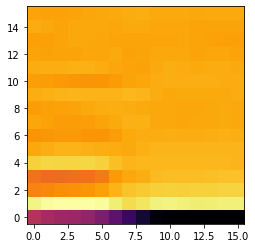

In [18]:
# TEST: Test shorter MFCC
from playsound import playsound

idx = 1

# Create path from given filename and target item
path = '/'.join([dataset_path, target_list[int(y_orig_train[idx])], 
            filenames_train[idx]])

# Create MFCCs
mfccs = calc_mfcc(path)
print("MFCCs:", mfccs)

# Plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

# TEST: Play problem sounds
print(target_list[int(y_orig_train[idx])])
print(path)
playsound(path)

In [19]:
# Function: Create MFCCs, keeping only ones of desired length
def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
        
    for index, filename in enumerate(in_files):
    
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])], 
                    filename)
        
        # Check to make sure we're reading a .wav file
        if not path.endswith('.wav'):
            continue

        # Create MFCCs
        mfccs = calc_mfcc(path)

        # Only keep MFCCs with given length
        if mfccs.shape[1] == len_mfcc:
            out_x.append(mfccs)
            out_y.append(in_y[index])
        else:
            print('Dropped:', index, mfccs.shape)
            prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [20]:
# Create train, validation, and test sets
x_train, y_train, prob = extract_features(filenames_train, 
                                          y_orig_train)
print('Removed percentage:', prob / len(y_orig_train))
x_val, y_val, prob = extract_features(filenames_val, y_orig_val)
print('Removed percentage:', prob / len(y_orig_val))
x_test, y_test, prob = extract_features(filenames_test, y_orig_test)
print('Removed percentage:', prob / len(y_orig_test))

Dropped: 22 (16, 13)
Dropped: 53 (16, 9)
Dropped: 69 (16, 13)
Dropped: 71 (16, 13)
Dropped: 76 (16, 15)
Dropped: 80 (16, 9)
Dropped: 97 (16, 14)
Dropped: 105 (16, 13)
Dropped: 126 (16, 11)
Dropped: 134 (16, 14)
Dropped: 138 (16, 13)
Dropped: 139 (16, 14)
Dropped: 143 (16, 13)
Dropped: 144 (16, 13)
Dropped: 152 (16, 11)
Dropped: 154 (16, 12)
Dropped: 162 (16, 13)
Dropped: 166 (16, 11)
Dropped: 202 (16, 9)
Dropped: 207 (16, 11)
Dropped: 223 (16, 8)
Dropped: 236 (16, 10)
Dropped: 254 (16, 15)
Dropped: 259 (16, 13)
Dropped: 283 (16, 12)
Dropped: 290 (16, 13)
Dropped: 314 (16, 15)
Dropped: 315 (16, 15)
Dropped: 334 (16, 14)
Dropped: 341 (16, 14)
Dropped: 361 (16, 11)
Dropped: 363 (16, 9)
Dropped: 364 (16, 10)
Dropped: 377 (16, 13)
Dropped: 407 (16, 11)
Dropped: 409 (16, 13)
Dropped: 422 (16, 14)
Dropped: 423 (16, 12)
Dropped: 426 (16, 12)
Dropped: 434 (16, 13)
Dropped: 444 (16, 12)
Dropped: 451 (16, 8)
Dropped: 458 (16, 14)
Dropped: 470 (16, 13)
Dropped: 475 (16, 11)
Dropped: 498 (16, 14)
D

Dropped: 4302 (16, 9)
Dropped: 4304 (16, 13)
Dropped: 4311 (16, 15)
Dropped: 4312 (16, 15)
Dropped: 4320 (16, 7)
Dropped: 4321 (16, 9)
Dropped: 4323 (16, 13)
Dropped: 4361 (16, 10)
Dropped: 4368 (16, 13)
Dropped: 4369 (16, 11)
Dropped: 4384 (16, 14)
Dropped: 4413 (16, 13)
Dropped: 4418 (16, 14)
Dropped: 4425 (16, 13)
Dropped: 4439 (16, 11)
Dropped: 4453 (16, 10)
Dropped: 4473 (16, 11)
Dropped: 4490 (16, 15)
Dropped: 4510 (16, 15)
Dropped: 4513 (16, 10)
Dropped: 4514 (16, 10)
Dropped: 4523 (16, 13)
Dropped: 4532 (16, 13)
Dropped: 4533 (16, 14)
Dropped: 4538 (16, 12)
Dropped: 4546 (16, 14)
Dropped: 4552 (16, 13)
Dropped: 4554 (16, 12)
Dropped: 4556 (16, 10)
Dropped: 4567 (16, 11)
Dropped: 4581 (16, 15)
Dropped: 4601 (16, 14)
Dropped: 4633 (16, 7)
Dropped: 4646 (16, 7)
Dropped: 4655 (16, 13)
Dropped: 4660 (16, 13)
Dropped: 4681 (16, 13)
Dropped: 4702 (16, 10)
Dropped: 4718 (16, 12)
Dropped: 4731 (16, 14)
Dropped: 4732 (16, 15)
Dropped: 4734 (16, 14)
Dropped: 4764 (16, 14)
Dropped: 4772 (1

Dropped: 8290 (16, 10)
Dropped: 8302 (16, 10)
Dropped: 8306 (16, 12)
Dropped: 8324 (16, 13)
Dropped: 8345 (16, 10)
Dropped: 8347 (16, 14)
Dropped: 8356 (16, 13)
Dropped: 8360 (16, 13)
Dropped: 8366 (16, 13)
Dropped: 8368 (16, 14)
Dropped: 8387 (16, 10)
Dropped: 8390 (16, 15)
Dropped: 8415 (16, 13)
Dropped: 8428 (16, 15)
Dropped: 8432 (16, 14)
Dropped: 8435 (16, 14)
Dropped: 8438 (16, 11)
Dropped: 8441 (16, 7)
Dropped: 8458 (16, 15)
Dropped: 8461 (16, 13)
Dropped: 8462 (16, 9)
Dropped: 8471 (16, 8)
Dropped: 8476 (16, 13)
Dropped: 8479 (16, 12)
Dropped: 8483 (16, 6)
Dropped: 8522 (16, 11)
Dropped: 8525 (16, 11)
Dropped: 8529 (16, 13)
Dropped: 8532 (16, 13)
Dropped: 8544 (16, 15)
Dropped: 8552 (16, 8)
Dropped: 8553 (16, 13)
Dropped: 8569 (16, 13)
Dropped: 8574 (16, 10)
Dropped: 8585 (16, 12)
Dropped: 8597 (16, 15)
Dropped: 8600 (16, 14)
Dropped: 8619 (16, 7)
Dropped: 8625 (16, 13)
Dropped: 8633 (16, 13)
Dropped: 8645 (16, 13)
Dropped: 8660 (16, 15)
Dropped: 8669 (16, 10)
Dropped: 8690 (16

Dropped: 12513 (16, 12)
Dropped: 12516 (16, 15)
Dropped: 12517 (16, 13)
Dropped: 12529 (16, 11)
Dropped: 12531 (16, 13)
Dropped: 12533 (16, 11)
Dropped: 12535 (16, 15)
Dropped: 12551 (16, 14)
Dropped: 12556 (16, 13)
Dropped: 12560 (16, 14)
Dropped: 12563 (16, 10)
Dropped: 12564 (16, 14)
Dropped: 12567 (16, 11)
Dropped: 12584 (16, 11)
Dropped: 12585 (16, 6)
Dropped: 12588 (16, 12)
Dropped: 12603 (16, 11)
Dropped: 12613 (16, 15)
Dropped: 12652 (16, 10)
Dropped: 12663 (16, 14)
Dropped: 12679 (16, 10)
Dropped: 12683 (16, 14)
Dropped: 12719 (16, 13)
Dropped: 12735 (16, 12)
Dropped: 12768 (16, 13)
Dropped: 12770 (16, 12)
Dropped: 12773 (16, 5)
Dropped: 12780 (16, 12)
Dropped: 12816 (16, 14)
Dropped: 12819 (16, 15)
Dropped: 12847 (16, 15)
Dropped: 12857 (16, 7)
Dropped: 12863 (16, 15)
Dropped: 12864 (16, 13)
Dropped: 12878 (16, 12)
Dropped: 12883 (16, 9)
Dropped: 12895 (16, 8)
Dropped: 12899 (16, 14)
Dropped: 12911 (16, 11)
Dropped: 12962 (16, 10)
Dropped: 12975 (16, 9)
Dropped: 12976 (16, 11

Dropped: 16837 (16, 11)
Dropped: 16845 (16, 13)
Dropped: 16847 (16, 12)
Dropped: 16887 (16, 7)
Dropped: 16905 (16, 15)
Dropped: 16911 (16, 15)
Dropped: 16913 (16, 8)
Dropped: 16918 (16, 15)
Dropped: 16956 (16, 11)
Dropped: 16959 (16, 13)
Dropped: 16961 (16, 7)
Dropped: 16967 (16, 12)
Dropped: 16978 (16, 15)
Dropped: 17012 (16, 10)
Dropped: 17019 (16, 8)
Dropped: 17025 (16, 13)
Dropped: 17042 (16, 14)
Dropped: 17054 (16, 11)
Dropped: 17086 (16, 13)
Dropped: 17091 (16, 15)
Dropped: 17098 (16, 10)
Dropped: 17112 (16, 11)
Dropped: 17117 (16, 14)
Dropped: 17126 (16, 9)
Dropped: 17134 (16, 10)
Dropped: 17160 (16, 8)
Dropped: 17193 (16, 12)
Dropped: 17198 (16, 12)
Dropped: 17209 (16, 13)
Dropped: 17219 (16, 8)
Dropped: 17226 (16, 6)
Dropped: 17246 (16, 15)
Dropped: 17254 (16, 15)
Dropped: 17295 (16, 9)
Dropped: 17316 (16, 13)
Dropped: 17317 (16, 7)
Dropped: 17338 (16, 15)
Dropped: 17346 (16, 5)
Dropped: 17355 (16, 13)
Dropped: 17362 (16, 11)
Dropped: 17387 (16, 15)
Dropped: 17401 (16, 11)
Dro

Dropped: 20932 (16, 8)
Dropped: 20958 (16, 13)
Dropped: 20959 (16, 13)
Dropped: 20985 (16, 15)
Dropped: 20995 (16, 9)
Dropped: 20997 (16, 15)
Dropped: 21023 (16, 11)
Dropped: 21029 (16, 14)
Dropped: 21078 (16, 12)
Dropped: 21081 (16, 14)
Dropped: 21090 (16, 15)
Dropped: 21106 (16, 9)
Dropped: 21109 (16, 13)
Dropped: 21113 (16, 12)
Dropped: 21121 (16, 15)
Dropped: 21130 (16, 11)
Dropped: 21132 (16, 11)
Dropped: 21136 (16, 12)
Dropped: 21147 (16, 15)
Dropped: 21181 (16, 7)
Dropped: 21195 (16, 11)
Dropped: 21214 (16, 14)
Dropped: 21215 (16, 13)
Dropped: 21232 (16, 10)
Dropped: 21239 (16, 12)
Dropped: 21255 (16, 12)
Dropped: 21261 (16, 15)
Dropped: 21262 (16, 13)
Dropped: 21263 (16, 8)
Dropped: 21266 (16, 14)
Dropped: 21274 (16, 14)
Dropped: 21288 (16, 12)
Dropped: 21289 (16, 13)
Dropped: 21300 (16, 15)
Dropped: 21312 (16, 15)
Dropped: 21344 (16, 6)
Dropped: 21365 (16, 13)
Dropped: 21369 (16, 8)
Dropped: 21373 (16, 9)
Dropped: 21375 (16, 13)
Dropped: 21393 (16, 7)
Dropped: 21415 (16, 12)
D

Dropped: 25437 (16, 7)
Dropped: 25440 (16, 7)
Dropped: 25444 (16, 11)
Dropped: 25448 (16, 13)
Dropped: 25472 (16, 10)
Dropped: 25479 (16, 14)
Dropped: 25487 (16, 12)
Dropped: 25495 (16, 8)
Dropped: 25519 (16, 8)
Dropped: 25526 (16, 14)
Dropped: 25548 (16, 10)
Dropped: 25550 (16, 14)
Dropped: 25555 (16, 14)
Dropped: 25562 (16, 12)
Dropped: 25570 (16, 12)
Dropped: 25603 (16, 13)
Dropped: 25605 (16, 13)
Dropped: 25628 (16, 11)
Dropped: 25641 (16, 13)
Dropped: 25650 (16, 15)
Dropped: 25677 (16, 15)
Dropped: 25703 (16, 15)
Dropped: 25710 (16, 7)
Dropped: 25729 (16, 15)
Dropped: 25751 (16, 12)
Dropped: 25770 (16, 15)
Dropped: 25771 (16, 15)
Dropped: 25780 (16, 13)
Dropped: 25801 (16, 14)
Dropped: 25807 (16, 10)
Dropped: 25818 (16, 13)
Dropped: 25819 (16, 13)
Dropped: 25820 (16, 11)
Dropped: 25830 (16, 11)
Dropped: 25832 (16, 13)
Dropped: 25833 (16, 13)
Dropped: 25870 (16, 14)
Dropped: 25904 (16, 11)
Dropped: 25908 (16, 15)
Dropped: 25941 (16, 15)
Dropped: 25978 (16, 11)
Dropped: 25981 (16, 1

Dropped: 29593 (16, 14)
Dropped: 29598 (16, 11)
Dropped: 29604 (16, 13)
Dropped: 29610 (16, 15)
Dropped: 29620 (16, 14)
Dropped: 29646 (16, 15)
Dropped: 29656 (16, 12)
Dropped: 29663 (16, 13)
Dropped: 29683 (16, 8)
Dropped: 29691 (16, 9)
Dropped: 29701 (16, 15)
Dropped: 29708 (16, 12)
Dropped: 29722 (16, 12)
Dropped: 29735 (16, 15)
Dropped: 29737 (16, 9)
Dropped: 29753 (16, 12)
Dropped: 29803 (16, 15)
Dropped: 29806 (16, 13)
Dropped: 29816 (16, 13)
Dropped: 29817 (16, 9)
Dropped: 29821 (16, 10)
Dropped: 29833 (16, 15)
Dropped: 29836 (16, 14)
Dropped: 29839 (16, 15)
Dropped: 29881 (16, 15)
Dropped: 29904 (16, 12)
Dropped: 29926 (16, 14)
Dropped: 29933 (16, 15)
Dropped: 29940 (16, 11)
Dropped: 29970 (16, 11)
Dropped: 29991 (16, 8)
Dropped: 30008 (16, 11)
Dropped: 30009 (16, 13)
Dropped: 30016 (16, 12)
Dropped: 30022 (16, 7)
Dropped: 30056 (16, 10)
Dropped: 30068 (16, 14)
Dropped: 30121 (16, 11)
Dropped: 30129 (16, 13)
Dropped: 30131 (16, 4)
Dropped: 30147 (16, 13)
Dropped: 30168 (16, 13)

Dropped: 33591 (16, 7)
Dropped: 33597 (16, 11)
Dropped: 33600 (16, 11)
Dropped: 33604 (16, 13)
Dropped: 33612 (16, 10)
Dropped: 33615 (16, 11)
Dropped: 33636 (16, 13)
Dropped: 33666 (16, 15)
Dropped: 33680 (16, 12)
Dropped: 33698 (16, 11)
Dropped: 33711 (16, 14)
Dropped: 33722 (16, 13)
Dropped: 33735 (16, 12)
Dropped: 33747 (16, 8)
Dropped: 33758 (16, 13)
Dropped: 33787 (16, 13)
Dropped: 33800 (16, 15)
Dropped: 33804 (16, 11)
Dropped: 33825 (16, 13)
Dropped: 33827 (16, 9)
Dropped: 33845 (16, 15)
Dropped: 33871 (16, 14)
Dropped: 33883 (16, 13)
Dropped: 33906 (16, 14)
Dropped: 33946 (16, 15)
Dropped: 33954 (16, 13)
Dropped: 33976 (16, 13)
Dropped: 33978 (16, 15)
Dropped: 33984 (16, 15)
Dropped: 33985 (16, 11)
Dropped: 33992 (16, 14)
Dropped: 33994 (16, 14)
Dropped: 34009 (16, 15)
Dropped: 34028 (16, 11)
Dropped: 34031 (16, 7)
Dropped: 34040 (16, 7)
Dropped: 34049 (16, 10)
Dropped: 34057 (16, 15)
Dropped: 34069 (16, 13)
Dropped: 34101 (16, 14)
Dropped: 34113 (16, 11)
Dropped: 34117 (16, 1

Dropped: 37338 (16, 13)
Dropped: 37356 (16, 14)
Dropped: 37372 (16, 13)
Dropped: 37375 (16, 14)
Dropped: 37393 (16, 13)
Dropped: 37417 (16, 15)
Dropped: 37418 (16, 13)
Dropped: 37419 (16, 10)
Dropped: 37420 (16, 13)
Dropped: 37429 (16, 15)
Dropped: 37450 (16, 13)
Dropped: 37464 (16, 15)
Dropped: 37470 (16, 11)
Dropped: 37472 (16, 15)
Dropped: 37487 (16, 11)
Dropped: 37504 (16, 14)
Dropped: 37506 (16, 14)
Dropped: 37512 (16, 13)
Dropped: 37522 (16, 13)
Dropped: 37540 (16, 11)
Dropped: 37542 (16, 7)
Dropped: 37552 (16, 12)
Dropped: 37554 (16, 13)
Dropped: 37558 (16, 11)
Dropped: 37562 (16, 15)
Dropped: 37580 (16, 11)
Dropped: 37592 (16, 13)
Dropped: 37603 (16, 5)
Dropped: 37619 (16, 12)
Dropped: 37653 (16, 15)
Dropped: 37661 (16, 10)
Dropped: 37690 (16, 11)
Dropped: 37711 (16, 13)
Dropped: 37715 (16, 11)
Dropped: 37717 (16, 11)
Dropped: 37729 (16, 11)
Dropped: 37732 (16, 13)
Dropped: 37742 (16, 12)
Dropped: 37750 (16, 9)
Dropped: 37760 (16, 10)
Dropped: 37763 (16, 12)
Dropped: 37775 (16,

Dropped: 41034 (16, 12)
Dropped: 41041 (16, 13)
Dropped: 41066 (16, 14)
Dropped: 41074 (16, 11)
Dropped: 41080 (16, 13)
Dropped: 41123 (16, 9)
Dropped: 41148 (16, 11)
Dropped: 41156 (16, 11)
Dropped: 41159 (16, 14)
Dropped: 41177 (16, 14)
Dropped: 41183 (16, 15)
Dropped: 41203 (16, 12)
Dropped: 41226 (16, 14)
Dropped: 41227 (16, 15)
Dropped: 41228 (16, 8)
Dropped: 41236 (16, 13)
Dropped: 41242 (16, 15)
Dropped: 41302 (16, 14)
Dropped: 41313 (16, 10)
Dropped: 41371 (16, 12)
Dropped: 41376 (16, 11)
Dropped: 41408 (16, 9)
Dropped: 41417 (16, 12)
Dropped: 41445 (16, 13)
Dropped: 41454 (16, 15)
Dropped: 41480 (16, 8)
Dropped: 41486 (16, 11)
Dropped: 41502 (16, 12)
Dropped: 41548 (16, 7)
Dropped: 41551 (16, 12)
Dropped: 41558 (16, 12)
Dropped: 41566 (16, 13)
Dropped: 41570 (16, 12)
Dropped: 41583 (16, 13)
Dropped: 41590 (16, 11)
Dropped: 41596 (16, 11)
Dropped: 41623 (16, 14)
Dropped: 41625 (16, 13)
Dropped: 41630 (16, 7)
Dropped: 41632 (16, 14)
Dropped: 41634 (16, 9)
Dropped: 41646 (16, 12)

Dropped: 45366 (16, 11)
Dropped: 45375 (16, 15)
Dropped: 45386 (16, 7)
Dropped: 45403 (16, 13)
Dropped: 45408 (16, 14)
Dropped: 45411 (16, 13)
Dropped: 45416 (16, 14)
Dropped: 45421 (16, 11)
Dropped: 45448 (16, 9)
Dropped: 45459 (16, 12)
Dropped: 45461 (16, 14)
Dropped: 45462 (16, 15)
Dropped: 45474 (16, 12)
Dropped: 45476 (16, 13)
Dropped: 45520 (16, 13)
Dropped: 45535 (16, 13)
Dropped: 45536 (16, 13)
Dropped: 45542 (16, 12)
Dropped: 45555 (16, 8)
Dropped: 45557 (16, 8)
Dropped: 45570 (16, 12)
Dropped: 45575 (16, 14)
Dropped: 45584 (16, 12)
Dropped: 45590 (16, 11)
Dropped: 45602 (16, 11)
Dropped: 45605 (16, 12)
Dropped: 45609 (16, 13)
Dropped: 45615 (16, 13)
Dropped: 45623 (16, 14)
Dropped: 45639 (16, 15)
Dropped: 45687 (16, 15)
Dropped: 45691 (16, 11)
Dropped: 45707 (16, 15)
Dropped: 45715 (16, 9)
Dropped: 45719 (16, 9)
Dropped: 45733 (16, 15)
Dropped: 45737 (16, 10)
Dropped: 45741 (16, 8)
Dropped: 45743 (16, 11)
Dropped: 45758 (16, 11)
Dropped: 45761 (16, 11)
Dropped: 45777 (16, 14)

Dropped: 49069 (16, 14)
Dropped: 49080 (16, 13)
Dropped: 49099 (16, 4)
Dropped: 49103 (16, 5)
Dropped: 49120 (16, 15)
Dropped: 49128 (16, 9)
Dropped: 49131 (16, 10)
Dropped: 49133 (16, 15)
Dropped: 49147 (16, 8)
Dropped: 49156 (16, 11)
Dropped: 49164 (16, 13)
Dropped: 49177 (16, 15)
Dropped: 49182 (16, 13)
Dropped: 49202 (16, 11)
Dropped: 49216 (16, 15)
Dropped: 49219 (16, 9)
Dropped: 49220 (16, 9)
Dropped: 49222 (16, 13)
Dropped: 49239 (16, 13)
Dropped: 49243 (16, 15)
Dropped: 49261 (16, 12)
Dropped: 49271 (16, 10)
Dropped: 49277 (16, 15)
Dropped: 49278 (16, 13)
Dropped: 49293 (16, 13)
Dropped: 49297 (16, 11)
Dropped: 49303 (16, 14)
Dropped: 49323 (16, 9)
Dropped: 49344 (16, 14)
Dropped: 49350 (16, 14)
Dropped: 49351 (16, 11)
Dropped: 49377 (16, 10)
Dropped: 49404 (16, 7)
Dropped: 49407 (16, 13)
Dropped: 49416 (16, 11)
Dropped: 49427 (16, 12)
Dropped: 49432 (16, 7)
Dropped: 49442 (16, 13)
Dropped: 49465 (16, 15)
Dropped: 49502 (16, 12)
Dropped: 49518 (16, 14)
Dropped: 49531 (16, 10)
D

Dropped: 53275 (16, 13)
Dropped: 53281 (16, 11)
Dropped: 53307 (16, 8)
Dropped: 53309 (16, 14)
Dropped: 53397 (16, 12)
Dropped: 53403 (16, 14)
Dropped: 53451 (16, 14)
Dropped: 53455 (16, 13)
Dropped: 53456 (16, 15)
Dropped: 53457 (16, 15)
Dropped: 53475 (16, 12)
Dropped: 53477 (16, 15)
Dropped: 53482 (16, 14)
Dropped: 53493 (16, 10)
Dropped: 53513 (16, 9)
Dropped: 53516 (16, 10)
Dropped: 53527 (16, 8)
Dropped: 53541 (16, 10)
Dropped: 53545 (16, 15)
Dropped: 53549 (16, 13)
Dropped: 53559 (16, 10)
Dropped: 53587 (16, 11)
Dropped: 53624 (16, 11)
Dropped: 53626 (16, 14)
Dropped: 53628 (16, 10)
Dropped: 53636 (16, 9)
Dropped: 53641 (16, 12)
Dropped: 53642 (16, 8)
Dropped: 53646 (16, 11)
Dropped: 53661 (16, 15)
Dropped: 53715 (16, 15)
Dropped: 53729 (16, 8)
Dropped: 53743 (16, 13)
Dropped: 53789 (16, 12)
Dropped: 53792 (16, 13)
Dropped: 53796 (16, 9)
Dropped: 53800 (16, 13)
Dropped: 53817 (16, 12)
Dropped: 53821 (16, 12)
Dropped: 53834 (16, 13)
Dropped: 53855 (16, 7)
Dropped: 53861 (16, 15)


Dropped: 57249 (16, 15)
Dropped: 57254 (16, 10)
Dropped: 57272 (16, 13)
Dropped: 57277 (16, 15)
Dropped: 57284 (16, 7)
Dropped: 57295 (16, 14)
Dropped: 57302 (16, 8)
Dropped: 57335 (16, 13)
Dropped: 57338 (16, 10)
Dropped: 57343 (16, 13)
Dropped: 57346 (16, 15)
Dropped: 57348 (16, 14)
Dropped: 57355 (16, 10)
Dropped: 57363 (16, 15)
Dropped: 57364 (16, 13)
Dropped: 57368 (16, 11)
Dropped: 57379 (16, 14)
Dropped: 57402 (16, 15)
Dropped: 57421 (16, 15)
Dropped: 57428 (16, 15)
Dropped: 57431 (16, 7)
Dropped: 57453 (16, 10)
Dropped: 57458 (16, 10)
Dropped: 57461 (16, 8)
Dropped: 57472 (16, 15)
Dropped: 57482 (16, 15)
Dropped: 57484 (16, 11)
Dropped: 57486 (16, 10)
Dropped: 57487 (16, 9)
Dropped: 57495 (16, 13)
Dropped: 57551 (16, 13)
Dropped: 57558 (16, 14)
Dropped: 57590 (16, 13)
Dropped: 57604 (16, 9)
Dropped: 57606 (16, 13)
Dropped: 57609 (16, 9)
Dropped: 57621 (16, 12)
Dropped: 57625 (16, 12)
Dropped: 57631 (16, 14)
Dropped: 57644 (16, 13)
Dropped: 57657 (16, 14)
Dropped: 57661 (16, 4)


Dropped: 60968 (16, 14)
Dropped: 60979 (16, 15)
Dropped: 60989 (16, 12)
Dropped: 60990 (16, 7)
Dropped: 60991 (16, 12)
Dropped: 60997 (16, 15)
Dropped: 61045 (16, 10)
Dropped: 61057 (16, 13)
Dropped: 61068 (16, 12)
Dropped: 61092 (16, 11)
Dropped: 61118 (16, 15)
Dropped: 61169 (16, 10)
Dropped: 61193 (16, 14)
Dropped: 61194 (16, 7)
Dropped: 61207 (16, 12)
Dropped: 61239 (16, 14)
Dropped: 61254 (16, 10)
Dropped: 61263 (16, 8)
Dropped: 61272 (16, 11)
Dropped: 61276 (16, 11)
Dropped: 61279 (16, 13)
Dropped: 61287 (16, 8)
Dropped: 61291 (16, 13)
Dropped: 61308 (16, 13)
Dropped: 61329 (16, 13)
Dropped: 61351 (16, 15)
Dropped: 61352 (16, 12)
Dropped: 61357 (16, 13)
Dropped: 61380 (16, 15)
Dropped: 61386 (16, 12)
Dropped: 61403 (16, 8)
Dropped: 61415 (16, 15)
Dropped: 61423 (16, 15)
Dropped: 61427 (16, 15)
Dropped: 61428 (16, 9)
Dropped: 61454 (16, 13)
Dropped: 61482 (16, 10)
Dropped: 61484 (16, 15)
Dropped: 61490 (16, 12)
Dropped: 61493 (16, 8)
Dropped: 61512 (16, 9)
Dropped: 61533 (16, 8)
D

Dropped: 65268 (16, 13)
Dropped: 65273 (16, 15)
Dropped: 65290 (16, 12)
Dropped: 65291 (16, 5)
Dropped: 65295 (16, 15)
Dropped: 65303 (16, 9)
Dropped: 65316 (16, 12)
Dropped: 65318 (16, 12)
Dropped: 65346 (16, 9)
Dropped: 65365 (16, 12)
Dropped: 65401 (16, 10)
Dropped: 65414 (16, 11)
Dropped: 65430 (16, 12)
Dropped: 65445 (16, 14)
Dropped: 65457 (16, 10)
Dropped: 65459 (16, 15)
Dropped: 65470 (16, 11)
Dropped: 65473 (16, 13)
Dropped: 65475 (16, 14)
Dropped: 65484 (16, 11)
Dropped: 65486 (16, 14)
Dropped: 65515 (16, 10)
Dropped: 65525 (16, 7)
Dropped: 65527 (16, 14)
Dropped: 65529 (16, 10)
Dropped: 65539 (16, 6)
Dropped: 65542 (16, 13)
Dropped: 65544 (16, 13)
Dropped: 65552 (16, 12)
Dropped: 65579 (16, 15)
Dropped: 65581 (16, 13)
Dropped: 65588 (16, 14)
Dropped: 65599 (16, 10)
Dropped: 65607 (16, 13)
Dropped: 65611 (16, 14)
Dropped: 65637 (16, 11)
Dropped: 65644 (16, 13)
Dropped: 65652 (16, 13)
Dropped: 65684 (16, 11)
Dropped: 65711 (16, 11)
Dropped: 65724 (16, 15)
Dropped: 65758 (16, 1

Dropped: 69425 (16, 11)
Dropped: 69438 (16, 11)
Dropped: 69450 (16, 11)
Dropped: 69456 (16, 15)
Dropped: 69497 (16, 13)
Dropped: 69507 (16, 13)
Dropped: 69533 (16, 11)
Dropped: 69549 (16, 8)
Dropped: 69560 (16, 13)
Dropped: 69570 (16, 8)
Dropped: 69601 (16, 9)
Dropped: 69620 (16, 13)
Dropped: 69628 (16, 11)
Dropped: 69656 (16, 15)
Dropped: 69674 (16, 14)
Dropped: 69676 (16, 11)
Dropped: 69690 (16, 15)
Dropped: 69691 (16, 10)
Dropped: 69692 (16, 14)
Dropped: 69710 (16, 12)
Dropped: 69744 (16, 12)
Dropped: 69762 (16, 13)
Dropped: 69763 (16, 14)
Dropped: 69780 (16, 13)
Dropped: 69803 (16, 11)
Dropped: 69816 (16, 10)
Dropped: 69817 (16, 14)
Dropped: 69827 (16, 13)
Dropped: 69847 (16, 10)
Dropped: 69866 (16, 15)
Dropped: 69875 (16, 13)
Dropped: 69879 (16, 7)
Dropped: 69891 (16, 13)
Dropped: 69906 (16, 14)
Dropped: 69907 (16, 9)
Dropped: 69948 (16, 10)
Dropped: 69962 (16, 15)
Dropped: 69968 (16, 13)
Dropped: 69973 (16, 8)
Dropped: 69975 (16, 9)
Dropped: 70006 (16, 15)
Dropped: 70021 (16, 11)

Dropped: 73626 (16, 10)
Dropped: 73633 (16, 15)
Dropped: 73666 (16, 12)
Dropped: 73667 (16, 7)
Dropped: 73744 (16, 7)
Dropped: 73757 (16, 10)
Dropped: 73776 (16, 15)
Dropped: 73779 (16, 9)
Dropped: 73791 (16, 13)
Dropped: 73806 (16, 12)
Dropped: 73818 (16, 8)
Dropped: 73841 (16, 7)
Dropped: 73842 (16, 10)
Dropped: 73855 (16, 7)
Dropped: 73862 (16, 14)
Dropped: 73864 (16, 12)
Dropped: 73869 (16, 8)
Dropped: 73874 (16, 7)
Dropped: 73879 (16, 13)
Dropped: 73887 (16, 6)
Dropped: 73888 (16, 15)
Dropped: 73910 (16, 10)
Dropped: 73964 (16, 13)
Dropped: 73972 (16, 9)
Dropped: 74008 (16, 12)
Dropped: 74018 (16, 2)
Dropped: 74023 (16, 13)
Dropped: 74035 (16, 10)
Dropped: 74079 (16, 14)
Dropped: 74081 (16, 10)
Dropped: 74090 (16, 11)
Dropped: 74118 (16, 14)
Dropped: 74130 (16, 13)
Dropped: 74135 (16, 13)
Dropped: 74136 (16, 14)
Dropped: 74140 (16, 11)
Dropped: 74148 (16, 15)
Dropped: 74165 (16, 15)
Dropped: 74169 (16, 10)
Dropped: 74182 (16, 13)
Dropped: 74183 (16, 14)
Dropped: 74185 (16, 15)
Dro

Dropped: 77368 (16, 15)
Dropped: 77373 (16, 13)
Dropped: 77418 (16, 14)
Dropped: 77436 (16, 10)
Dropped: 77439 (16, 11)
Dropped: 77442 (16, 13)
Dropped: 77452 (16, 15)
Dropped: 77457 (16, 14)
Dropped: 77459 (16, 12)
Dropped: 77464 (16, 7)
Dropped: 77474 (16, 14)
Dropped: 77487 (16, 14)
Dropped: 77503 (16, 15)
Dropped: 77544 (16, 12)
Dropped: 77555 (16, 8)
Dropped: 77565 (16, 14)
Dropped: 77567 (16, 13)
Dropped: 77572 (16, 10)
Dropped: 77575 (16, 11)
Dropped: 77578 (16, 13)
Dropped: 77599 (16, 14)
Dropped: 77600 (16, 12)
Dropped: 77614 (16, 11)
Dropped: 77634 (16, 14)
Dropped: 77649 (16, 11)
Dropped: 77664 (16, 11)
Dropped: 77672 (16, 9)
Dropped: 77674 (16, 15)
Dropped: 77683 (16, 13)
Dropped: 77688 (16, 13)
Dropped: 77690 (16, 14)
Dropped: 77700 (16, 15)
Dropped: 77701 (16, 13)
Dropped: 77726 (16, 10)
Dropped: 77727 (16, 13)
Dropped: 77733 (16, 14)
Dropped: 77735 (16, 15)
Dropped: 77764 (16, 13)
Dropped: 77774 (16, 13)
Dropped: 77820 (16, 9)
Dropped: 77830 (16, 13)
Dropped: 77841 (16, 

Dropped: 81376 (16, 14)
Dropped: 81388 (16, 13)
Dropped: 81408 (16, 15)
Dropped: 81411 (16, 7)
Dropped: 81422 (16, 9)
Dropped: 81433 (16, 15)
Dropped: 81436 (16, 7)
Dropped: 81440 (16, 13)
Dropped: 81447 (16, 11)
Dropped: 81456 (16, 13)
Dropped: 81458 (16, 10)
Dropped: 81463 (16, 15)
Dropped: 81493 (16, 15)
Dropped: 81521 (16, 12)
Dropped: 81526 (16, 13)
Dropped: 81528 (16, 9)
Dropped: 81532 (16, 15)
Dropped: 81535 (16, 11)
Dropped: 81536 (16, 11)
Dropped: 81556 (16, 12)
Dropped: 81595 (16, 11)
Dropped: 81603 (16, 13)
Dropped: 81632 (16, 12)
Dropped: 81646 (16, 11)
Dropped: 81670 (16, 10)
Dropped: 81673 (16, 13)
Dropped: 81682 (16, 13)
Dropped: 81686 (16, 14)
Dropped: 81700 (16, 11)
Dropped: 81705 (16, 15)
Dropped: 81711 (16, 10)
Dropped: 81718 (16, 15)
Dropped: 81734 (16, 15)
Dropped: 81737 (16, 13)
Dropped: 81768 (16, 11)
Dropped: 81779 (16, 11)
Dropped: 81806 (16, 9)
Dropped: 81814 (16, 14)
Dropped: 81843 (16, 11)
Dropped: 81845 (16, 10)
Dropped: 81906 (16, 15)
Dropped: 81958 (16, 1

Dropped: 959 (16, 11)
Dropped: 984 (16, 15)
Dropped: 985 (16, 15)
Dropped: 999 (16, 12)
Dropped: 1006 (16, 15)
Dropped: 1023 (16, 13)
Dropped: 1044 (16, 12)
Dropped: 1057 (16, 15)
Dropped: 1073 (16, 7)
Dropped: 1075 (16, 14)
Dropped: 1082 (16, 11)
Dropped: 1099 (16, 11)
Dropped: 1115 (16, 15)
Dropped: 1117 (16, 7)
Dropped: 1123 (16, 12)
Dropped: 1144 (16, 13)
Dropped: 1157 (16, 12)
Dropped: 1167 (16, 14)
Dropped: 1203 (16, 13)
Dropped: 1212 (16, 15)
Dropped: 1213 (16, 6)
Dropped: 1214 (16, 12)
Dropped: 1227 (16, 15)
Dropped: 1241 (16, 5)
Dropped: 1244 (16, 14)
Dropped: 1260 (16, 13)
Dropped: 1268 (16, 15)
Dropped: 1307 (16, 10)
Dropped: 1332 (16, 14)
Dropped: 1375 (16, 14)
Dropped: 1409 (16, 12)
Dropped: 1413 (16, 14)
Dropped: 1414 (16, 12)
Dropped: 1426 (16, 12)
Dropped: 1445 (16, 11)
Dropped: 1450 (16, 12)
Dropped: 1456 (16, 9)
Dropped: 1467 (16, 14)
Dropped: 1475 (16, 10)
Dropped: 1479 (16, 15)
Dropped: 1501 (16, 15)
Dropped: 1502 (16, 6)
Dropped: 1545 (16, 15)
Dropped: 1554 (16, 13

Dropped: 5416 (16, 14)
Dropped: 5428 (16, 13)
Dropped: 5432 (16, 12)
Dropped: 5460 (16, 15)
Dropped: 5463 (16, 10)
Dropped: 5467 (16, 10)
Dropped: 5504 (16, 13)
Dropped: 5524 (16, 8)
Dropped: 5531 (16, 15)
Dropped: 5536 (16, 11)
Dropped: 5556 (16, 10)
Dropped: 5577 (16, 15)
Dropped: 5610 (16, 12)
Dropped: 5648 (16, 9)
Dropped: 5670 (16, 10)
Dropped: 5673 (16, 9)
Dropped: 5690 (16, 10)
Dropped: 5706 (16, 11)
Dropped: 5719 (16, 13)
Dropped: 5720 (16, 13)
Dropped: 5743 (16, 10)
Dropped: 5759 (16, 13)
Dropped: 5770 (16, 4)
Dropped: 5775 (16, 9)
Dropped: 5778 (16, 11)
Dropped: 5789 (16, 12)
Dropped: 5794 (16, 15)
Dropped: 5799 (16, 10)
Dropped: 5801 (16, 12)
Dropped: 5839 (16, 11)
Dropped: 5853 (16, 9)
Dropped: 5857 (16, 13)
Dropped: 5861 (16, 12)
Dropped: 5883 (16, 12)
Dropped: 5887 (16, 15)
Dropped: 5891 (16, 13)
Dropped: 5902 (16, 15)
Dropped: 5904 (16, 13)
Dropped: 5930 (16, 14)
Dropped: 5952 (16, 13)
Dropped: 5959 (16, 15)
Dropped: 5979 (16, 13)
Dropped: 5996 (16, 10)
Dropped: 6001 (16

Dropped: 9789 (16, 14)
Dropped: 9865 (16, 9)
Dropped: 9869 (16, 11)
Dropped: 9897 (16, 13)
Dropped: 9903 (16, 12)
Dropped: 9914 (16, 10)
Dropped: 9934 (16, 8)
Dropped: 9935 (16, 10)
Dropped: 9959 (16, 6)
Dropped: 9961 (16, 9)
Dropped: 9982 (16, 12)
Dropped: 10015 (16, 14)
Dropped: 10025 (16, 9)
Dropped: 10026 (16, 12)
Dropped: 10042 (16, 15)
Dropped: 10068 (16, 14)
Dropped: 10071 (16, 13)
Dropped: 10078 (16, 15)
Dropped: 10087 (16, 13)
Dropped: 10091 (16, 7)
Dropped: 10092 (16, 13)
Dropped: 10099 (16, 11)
Dropped: 10109 (16, 11)
Dropped: 10129 (16, 15)
Dropped: 10142 (16, 15)
Dropped: 10143 (16, 11)
Dropped: 10147 (16, 13)
Dropped: 10167 (16, 15)
Dropped: 10187 (16, 11)
Dropped: 10192 (16, 7)
Dropped: 10198 (16, 12)
Dropped: 10243 (16, 15)
Dropped: 10253 (16, 9)
Dropped: 10271 (16, 11)
Dropped: 10284 (16, 15)
Dropped: 10305 (16, 12)
Dropped: 10308 (16, 10)
Dropped: 10312 (16, 12)
Dropped: 10336 (16, 14)
Dropped: 10340 (16, 11)
Dropped: 10346 (16, 13)
Dropped: 10379 (16, 13)
Dropped: 10

Dropped: 3480 (16, 11)
Dropped: 3505 (16, 12)
Dropped: 3519 (16, 14)
Dropped: 3541 (16, 14)
Dropped: 3544 (16, 8)
Dropped: 3548 (16, 14)
Dropped: 3574 (16, 8)
Dropped: 3577 (16, 9)
Dropped: 3581 (16, 14)
Dropped: 3591 (16, 14)
Dropped: 3609 (16, 14)
Dropped: 3613 (16, 14)
Dropped: 3615 (16, 12)
Dropped: 3625 (16, 12)
Dropped: 3642 (16, 11)
Dropped: 3658 (16, 11)
Dropped: 3659 (16, 13)
Dropped: 3691 (16, 12)
Dropped: 3695 (16, 11)
Dropped: 3701 (16, 9)
Dropped: 3711 (16, 11)
Dropped: 3740 (16, 12)
Dropped: 3759 (16, 13)
Dropped: 3761 (16, 15)
Dropped: 3772 (16, 8)
Dropped: 3776 (16, 12)
Dropped: 3780 (16, 10)
Dropped: 3783 (16, 11)
Dropped: 3785 (16, 10)
Dropped: 3794 (16, 8)
Dropped: 3800 (16, 11)
Dropped: 3833 (16, 13)
Dropped: 3842 (16, 13)
Dropped: 3865 (16, 13)
Dropped: 3892 (16, 15)
Dropped: 3906 (16, 14)
Dropped: 3921 (16, 15)
Dropped: 3927 (16, 14)
Dropped: 3932 (16, 10)
Dropped: 3938 (16, 14)
Dropped: 3945 (16, 12)
Dropped: 3946 (16, 11)
Dropped: 3954 (16, 9)
Dropped: 3973 (16,

Dropped: 7780 (16, 11)
Dropped: 7783 (16, 14)
Dropped: 7799 (16, 12)
Dropped: 7816 (16, 15)
Dropped: 7817 (16, 14)
Dropped: 7821 (16, 10)
Dropped: 7822 (16, 13)
Dropped: 7827 (16, 14)
Dropped: 7860 (16, 12)
Dropped: 7872 (16, 11)
Dropped: 7874 (16, 11)
Dropped: 7891 (16, 10)
Dropped: 7893 (16, 13)
Dropped: 7906 (16, 12)
Dropped: 7909 (16, 15)
Dropped: 7917 (16, 13)
Dropped: 7921 (16, 11)
Dropped: 7934 (16, 15)
Dropped: 7937 (16, 15)
Dropped: 7954 (16, 11)
Dropped: 7986 (16, 13)
Dropped: 7992 (16, 12)
Dropped: 7995 (16, 15)
Dropped: 7999 (16, 11)
Dropped: 8003 (16, 15)
Dropped: 8009 (16, 15)
Dropped: 8012 (16, 11)
Dropped: 8013 (16, 13)
Dropped: 8029 (16, 13)
Dropped: 8032 (16, 12)
Dropped: 8034 (16, 7)
Dropped: 8056 (16, 15)
Dropped: 8065 (16, 12)
Dropped: 8066 (16, 11)
Dropped: 8094 (16, 14)
Dropped: 8095 (16, 10)
Dropped: 8098 (16, 10)
Dropped: 8115 (16, 15)
Dropped: 8128 (16, 10)
Dropped: 8130 (16, 15)
Dropped: 8135 (16, 6)
Dropped: 8164 (16, 14)
Dropped: 8168 (16, 15)
Dropped: 8198

In [21]:
# Save features and truth vector (y) sets to disk
np.savez(feature_sets_file, 
         x_train=x_train, 
         y_train=y_train, 
         x_val=x_val, 
         y_val=y_val, 
         x_test=x_test, 
         y_test=y_test)

In [22]:
# TEST: Load features
feature_sets = np.load(feature_sets_file)
feature_sets.files

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']

In [23]:
len(feature_sets['x_train'])

77455

In [24]:
print(feature_sets['y_val'])

[ 2. 10. 21. ... 33.  2.  5.]
